In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from skimage.feature import local_binary_pattern
from numpy.lib.stride_tricks import as_strided as ast
import matplotlib.cm as cm

In [2]:
def block_view(A, block= (32, 32)):
    # simple shape and strides computations may seem at first strange
    # unless one is able to recognize the 'tuple additions' involved ;-)
    shape= (A.shape[0]/ block[0], A.shape[1]/ block[1])+ block
    strides= (block[0]* A.strides[0], block[1]* A.strides[1])+ A.strides
    return ast(A, shape= shape, strides= strides)

In [3]:
def normalize(v):
	norm=np.linalg.norm(v)
	if norm==0: 
	   return v
	return v/norm

In [4]:
def getLBP(img):
	img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	radius = 1
	n_points = 8 * radius
	lbpImage = (local_binary_pattern(img2, n_points, radius)).astype(int)**(1.0/radius)

	# block processing:
	lbpImages = block_view(lbpImage, ( int(lbpImage.shape[0] / 2), int(lbpImage.shape[1] / 4)))

	
	count = 0

	LBP = np.array([]);	
	for i in range(lbpImages.shape[0]):			# for each block:
		for j in range(lbpImages.shape[1]):
			count += 1
#			plt.subplot(4,2,count)
#			plt.imshow(lbpImages[i,j,:,:],cmap = cm.Greys_r)
#			plt.subplot(4,2,count+4*2/2)
#			print count*2+1
			LBPt = cv2.calcHist([lbpImages[i,j,:,:].astype('uint8')], [0], None, [8], [0, 256])	
			LBP = np.append(LBP, LBPt[:,0]);
#			plt.plot(LBPt)
#	plt.show()

	
	Fnames = ["LBP"+str(i).zfill(2) for i in range(len(LBP))]

	return normalize(LBP).tolist(), Fnames




In [6]:
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

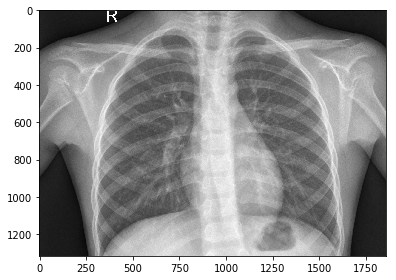

In [15]:
image = imread('/Users/mithunkumar/Documents/PhD/COVID Research/COVIDE/chest_xray/test/NORMAL/IM-0001-0001.jpeg', 1)
#image = imread('/Users/mithunkumar/Documents/PhD/COVID Research/COVIDE/chest_xray/test/NORMAL/IM-0001-0001.jpeg', as_gray=False)
#image = imread('/Users/mithunkumar/Documents/PhD/COVID Research/COVIDE/chest_xray/test/NORMAL/IM-0001-0001.jpeg', IMREAD_COLOR)
imshow(image)

In [16]:
getLBP(image)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
